<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


(18775, 102)
(15958, 98)
(11169, 98)
(2394, 98)
(2395, 98)
Epoch 1/1500
350/350 [==============================] - 1s 2ms/step - loss: 19.7970 - binary_accuracy: 0.5200 - val_loss: 1.6292 - val_binary_accuracy: 0.6113
Epoch 2/1500
350/350 [==============================] - 1s 2ms/step - loss: 11.2209 - binary_accuracy: 0.5105 - val_loss: 1.2812 - val_binary_accuracy: 0.5766
Epoch 3/1500
350/350 [==============================] - 1s 2ms/step - loss: 6.7813 - binary_accuracy: 0.5148 - val_loss: 1.1777 - val_binary_accuracy: 0.5549
Epoch 4/1500
350/350 [==============================] - 1s 2ms/step - loss: 3.9843 - binary_accuracy: 0.5241 - val_loss: 0.9387 - val_binary_accuracy: 0.5349
Epoch 5/1500
350/350 [==============================] - 1s 2ms/step - loss: 2.6037 - binary_accuracy: 0.5248 - val_loss: 0.7790 - val_binary_accuracy: 0.5253
Epoch 6/1500
350/350 [==============================] - 1s 2ms/step - loss: 1.9105 - binary_accuracy: 0.5177 - val_loss: 0.7221 - val_binary_accuracy

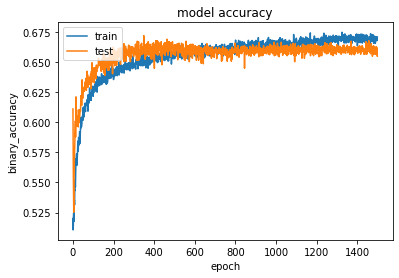

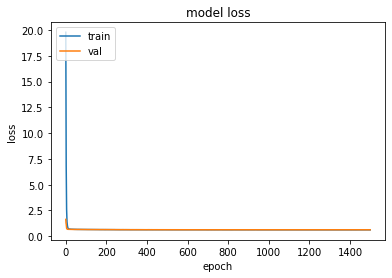

In [46]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


#CSV_COLUMN_NAMES označuje nadpisy sloupců v csv soubour
CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']



train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
print(train.shape)#vypíše nám dimenzionalitu našeho dataframu (2, 3) 2 řádky 3 sloupce

#následující 2 řádky nám upraví dva sloupce z textových na číselné formáty (category datatype)
train['team_one_name']=pd.Categorical(train['team_one_name']).codes #sníží využití paměti z 1.2MB na 0.03 MB viz: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#Odstraním z dataframu následující sloupce (odkaz na zápas a jména týmů), jelikož jsem je využíval pouze při sběru dat
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')

train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')

train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
#predictors nám vybere všechny sloupce, které jsou využity pro predikování výsledků neboli target_column
target_column = ['Result'] 
predictors = list(set(list(train.columns))-set(target_column))

scalerData=train.copy()
scalerData.pop('Result')

predictionScaler=MinMaxScaler(feature_range=(0,2))
X = train[predictors].values
y = train[target_column].values
predictionScaler.fit(scalerData)

#n = 100 # Max number of neighbours you want to consider
#param_grid = {'n_neighbors': np.arange(n)}
#grid = GridSearchCV(KNeighborsClassifier(), param_grid)
#grid.fit(X,y)
#print(grid.best_params_)


#určíme outliers (odlehlé hodnoty, které by mohly být při tréninku pro model škodlivé)
#zkráceně řečeno zjistíme odlehlou hodnotu tak, že ve svém okolí má oproti jiným hodnotám o dost méně "sousedů"
#15% dat 
lof = LocalOutlierFactor(contamination=0.15,n_neighbors=96)
yhat = lof.fit_predict(X)
mask = yhat != -1
X, y= X[mask, :], y[mask]
print(X.shape)

#rozdělíme náš dataframe na trénovací, testovací a validační dataset
#testovací dataset bude 15% random_state=98
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=3332)#32 #888 887

#validační set bude 15% random_state=75
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765,random_state=7215) # 0.1765 x 0.85 = 0.15 podívat se na cross-validation


print(X_train.shape) 
print(X_test.shape)
print(X_val.shape) #součet odpovídá X.shape

#vytvoříme scaler, který nám data přetransformuje na formát lepší pro model ?
#scalujeme data aby si model nemyslel, že větší číselný řád indikuje větší důležitost atributu
#https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
#https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler

#nepoužíváme minmaxscaler, protože naše data by měly být "normálně" distribuovány

X_train = pd.DataFrame(X_train, columns=CSV_COLUMN_NAMES2)
X_test=pd.DataFrame(X_test, columns=CSV_COLUMN_NAMES2)
X_val=pd.DataFrame(X_val, columns=CSV_COLUMN_NAMES2)

X_train=predictionScaler.transform(X_train)
X_test=predictionScaler.transform(X_test)
X_val=predictionScaler.transform(X_val)


#64 32
#data máme připravena, tak vytvoříme sequential model, jelikož potřebujeme mít více vrstev, ale máme pouze 1 input (zápas) a output 0;1
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(98)))#https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
model.add(Dense(64, activation='relu'))#input layer je už v modelu defaultně
model.add(keras.layers.Dropout(0.5))#50% inputů dropne abz se příliš nespoléhala na vybrané inputy
model.add(Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))#jelikož děláme binární klasifikaci, tak aktivační funkce bude sigmoid popř. softmax, zde by mezi těmito dvěmi neměl být výkonově rozdíl viz:https://stats.stackexchange.com/questions/218542/which-activation-function-for-output-layer
model.add(Dense(1, activation='sigmoid'))


#tady jsem skončil s vysvětlováním!!!
#model zkompilujeme s parametry:
#optimizer bude ? optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9
#loss funkce bude BinaryCrossentropy, jelikož máme binární klasifikátor
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.07), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
              metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None))#metrics=['accuracy'] je to jedno accuracy se vnitřně přetransformuje na binary accuracy, kvůli binary crossentropy loss funkci

#[tf.keras.metrics.BinaryAccuracy()]

#Adagrad(learning_rate=0.01) kolem 100 epochs a 32 batch_size je kolem 0.67


history = model.fit(X_train, y_train, epochs=1500,batch_size=32,validation_data=(X_val, y_val))#validační data pro změny při tréninku sítě
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))#úspěšnost na trénovacím setu   


pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)# zkusit změnit verbose zde a nahoře na 1 a 2 mělo by to zobrazovat více údajů při tréninku
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))#úspěšnost na testovacím setu



plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky





In [49]:
Xnew=np.array([[1.7,2.05,57,43,0.69,0.5,0.5,0.5,1.2,0.62,0.71,1.31,77.8,0.78,0.33,1.26,2.6,1.2,0.67,0.74,1.17,85.5,0.79,0.62,1.18,4.6,1.09,0.67,0.71,1.04,78.3,0.73,0.51,1.08,4.4,0.99,0.69,0.71,0.9,71.7,0.61,0.55,0.89,6.0,0.86,0.7,0.66,0.82,61.8,0.54,0.38,0.77,4.6,1.1,0.68,0.71,1.13,86.8,0.68,0.58,1.00,4.4,1.2,0.65,0.71,1.35,79.1,0.81,0.31,1.26,1.0,1.02,0.69,0.68,0.99,72.9,0.66,0.56,0.95,3.7,1.05,0.63,0.69,1.0,71.2,0.67,0.59,1.07,3.9,1.0925,0.6625,0.6975,1.1175,77.5,0.7050000000000001,0.51,1.07,3.2500000000000004],
               [1.3,3.2,20,134,0.44,0.71,0.473,0.5,1.1,0.67,0.69,1.13,82.3,0.7,0.44,1.05,8.1,1.1,0.6,0.71,1.06,71.0,0.69,0.3,1.14,4.3,1.06,0.68,0.71,0.97,76.6,0.71,0.54,1.04,3.1,0.97,0.69,0.71,0.95,65.6,0.6,0.53,0.88,3.7,0.87,0.7,0.68,0.77,62.4,0.53,0.61,0.75,3.6,1.22,0.66,0.73,1.36,85.0,0.77,0.53,1.18,5.0,1.22,0.64,0.75,1.25,83.5,0.79,0.48,1.23,6.4,1.16,0.57,0.76,1.01,75.0,0.73,0.27,1.28,3.3,1.1,0.59,0.72,1.0,74.5,0.66,0.62,1.12,4.9,0.85,0.71,0.64,0.88,60.9,0.56,0.43,0.78,4.0],
               [2.03,1.73,74,33,0.67,0.47,0.472,0.589,1.27,0.62,0.76,1.36,87.7,0.8,0.59,1.30,3.5,1.12,0.65,0.76,1.01,75.3,0.76,0.52,1.17,4.3,1.11,0.61,0.71,1.12,70.9,0.71,0.34,1.16,7.5,1.09,0.64,0.71,1.16,75.5,0.67,0.48,1.05,5.8,0.96,0.68,0.68,0.93,71.5,0.59,0.46,0.86,4.2,1.24,0.54,0.76,1.29,73.4,0.75,0.26,1.39,2.5,1.18,0.65,0.7,1.26,83.1,0.75,0.52,1.16,5.8,0.99,0.66,0.7,0.88,70.9,0.6,0.56,0.91,5.4,0.95,0.68,0.69,0.84,69.7,0.6,0.55,0.88,8.6,0.94,0.68,0.66,0.87,69.0,0.6,0.6,0.89,3.3],
               [2.3,1.5,25,22,0.59,0.66,0.5,0.521,1.2,0.57,0.73,1.14,78.4,0.76,0.24,1.33,3.7,1.13,0.67,0.69,1.16,82.6,0.73,0.5,1.09,5.0,1.0,0.64,0.68,0.9,71.2,0.64,0.59,0.99,4.4,0.91,0.67,0.67,0.83,67.0,0.57,0.47,0.85,5.7,1.06,0.6375,0.6925,1.0074999999999998,74.8,0.6749999999999999,0.45,1.065,4.7,1.19,0.59,0.72,1.22,75.5,0.76,0.27,1.28,2.2,1.12,0.6,0.73,1.01,76.8,0.68,0.44,1.14,5.1,1.11,0.68,0.71,1.13,81.7,0.73,0.53,1.07,4.0,1.01,0.68,0.7,0.98,73.4,0.63,0.54,0.93,6.9,1.1075,0.6375000000000001,0.7150000000000001,1.085,76.85,0.7,0.445,1.105,4.550000000000001],
               [1.52,2.33,30,35,0.71,0.64,0.523,0.51,1.17,0.59,0.74,1.11,75.9,0.74,0.31,1.25,3.5,1.13,0.67,0.71,1.16,82.6,0.73,0.61,1.09,5.4,1.12,0.62,0.73,1.09,73.7,0.71,0.58,1.15,3.0,1.1,0.65,0.7,1.12,77.3,0.72,0.54,1.10,3.8,0.92,0.66,0.68,0.88,64.3,0.56,0.51,0.85,6.5,1.27,0.65,0.77,1.26,89.8,0.81,0.47,1.25,6.0,1.16,0.66,0.78,1.14,78.8,0.7,0.4,1.06,3.4,1.08,0.66,0.72,1.0,77.6,0.68,0.63,1.03,4.1,1.07,0.58,0.73,1.03,65.2,0.67,0.28,1.15,4.0,1.02,0.68,0.72,0.94,72.4,0.66,0.45,0.97,4.0],
               [1.22,4.00,2,9,0.89,0.56,0.549,0.478,1.26,0.6,0.74,1.36,84.5,0.8,0.52,1.33,7.8,1.23,0.49,0.75,1.2,72.7,0.71,0.28,1.45,5.5,1.17,0.58,0.73,1.15,80.9,0.69,0.45,1.18,6.5,1.15,0.67,0.7,1.34,82.6,0.71,0.46,1.06,7.5,0.94,0.54,0.74,0.68,54.9,0.5,0.45,0.93,7.2,1.15,0.69,0.68,1.2,85.9,0.75,0.33,1.09,5.0,1.01,0.76,0.6,1.22,84.6,0.69,0.44,0.92,6.1,1.0,0.63,0.71,0.89,67.9,0.6,0.46,0.96,4.2,0.93,0.71,0.68,0.89,67.3,0.65,0.46,0.93,4.2,0.88,0.7,0.69,0.74,62.0,0.57,0.55,0.82,3.8],
               [1.43,2.76,27,60,0.59,0.67,0.479,0.527,1.16,0.6,0.73,1.14,74.2,0.74,0.33,1.24,3.1,1.13,0.77,0.71,1.26,85.8,0.78,0.67,1.01,5.7,1.06,0.65,0.7,1.04,74.0,0.67,0.46,1.04,3.0,1.06,0.66,0.73,0.93,76.4,0.67,0.46,1.01,6.4,0.94,0.66,0.71,0.83,65.5,0.57,0.51,0.85,8.8,1.14,0.71,0.73,1.15,83.4,0.77,0.43,1.09,5.8,1.09,0.65,0.73,1.15,71.0,0.7,0.32,1.08,4.6,1.08,0.65,0.67,1.05,80.7,0.71,0.49,1.09,7.8,1.05,0.64,0.75,0.98,73.5,0.6,0.65,0.94,6.0,0.89,0.63,0.7,0.73,57.7,0.57,0.35,0.90,2.4],
               [1.88,1.82,36,30,0.7,0.71,0.549,0.532,1.32,0.55,0.78,1.23,85.2,0.85,0.39,1.54,2.6,1.1,0.67,0.72,1.14,76.1,0.68,0.58,1.03,4.1,1.1,0.66,0.72,1.01,80.7,0.69,0.46,1.05,3.8,1.09,0.71,0.69,1.15,81.2,0.72,0.59,1.01,4.0,0.96,0.62,0.71,0.81,63.1,0.61,0.58,0.97,2.1,1.16,0.59,0.73,1.12,75.1,0.73,0.31,1.24,3.4,1.15,0.67,0.71,1.17,83.3,0.74,0.61,1.10,5.5,1.14,0.62,0.73,1.11,74.9,0.72,0.59,1.17,2.9,1.11,0.64,0.71,1.12,77.4,0.72,0.54,1.12,3.6,0.91,0.67,0.68,0.87,63.7,0.55,0.51,0.83,6.2]
               ])
Xnew=predictionScaler.transform(Xnew)
model= keras.models.load_model("68model.h5")

ynew=(model.predict([Xnew]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)

[[0.49930856]
 [0.50274837]
 [0.54266787]
 [0.50696707]
 [0.5187108 ]
 [0.5136547 ]
 [0.5154686 ]
 [0.5333279 ]]


In [26]:
model.save('/content/save/68model.h5')

In [ ]:
n = 100 # Max number of neighbours you want to consider
param_grid = {'n_neighbors': np.arange(n)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X,y)
print(grid.best_params_)

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6683375104427736


In [ ]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)

#print(X_val)
pokus=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
pokus.pop('Match_link')
pokus.pop('team_one_name')
pokus.pop('team_two_name')
pokus.pop('Result')


scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(pokus)
data=scaler.transform(pokus)
print(data)
